In [2]:
# Basic Import
import numpy as np
import pandas as pd

# Vis.
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


import warnings


import os
for dirname, _, filenames in os.walk('/E:/finalproject'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [64]:
data["mean_scores"] = (data["math score"] + data["reading score"] + data["writing score"]) / 3


In [65]:
# There is no missing value so I want to look statistical information with describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   mean_scores                  1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [66]:
data.describe().T
# data is distributed as normally but,
# math score has 0 point cause math is harder than other all the time.
# when I look the data, I can see min exam_score is 27.
# Values of mean and 50% is so close.

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089000,15.163080,0.0,57.000000,66.000000,77.000000,100.0
reading score,1000.0,69.169000,14.600192,17.0,59.000000,70.000000,79.000000,100.0
writing score,1000.0,68.054000,15.195657,10.0,57.750000,69.000000,79.000000,100.0
mean_scores,1000.0,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0


In [67]:
#Identify non-numeric columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Drop non-numeric columns from the original DataFrame
data_numeric = data.drop(columns=categorical_columns)

# Calculate correlation matrix for numeric columns only
numeric_correlation_matrix = data_numeric.corr()
print("Numeric Correlation Matrix:")
print(numeric_correlation_matrix)

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Calculate correlation matrix for the entire dataset (including one-hot encoded columns)
correlation_matrix = data_encoded.corr()
print("\nCorrelation Matrix with One-Hot Encoded Categorical Columns:")
print(correlation_matrix)

# Now, you can also run data.corr()
original_correlation_matrix = data_encoded.corr()
print("\nOriginal Correlation Matrix (including non-numeric columns):")
print(original_correlation_matrix)


Numeric Correlation Matrix:
               math score  reading score  writing score  mean_scores
math score       1.000000       0.817580       0.802642     0.918746
reading score    0.817580       1.000000       0.954598     0.970331
writing score    0.802642       0.954598       1.000000     0.965667
mean_scores      0.918746       0.970331       0.965667     1.000000

Correlation Matrix with One-Hot Encoded Categorical Columns:
                                                math score  reading score  \
math score                                        1.000000       0.817580   
reading score                                     0.817580       1.000000   
writing score                                     0.802642       0.954598   
mean_scores                                       0.918746       0.970331   
gender_female                                    -0.167982       0.244313   
gender_male                                       0.167982      -0.244313   
race/ethnicity_group A    

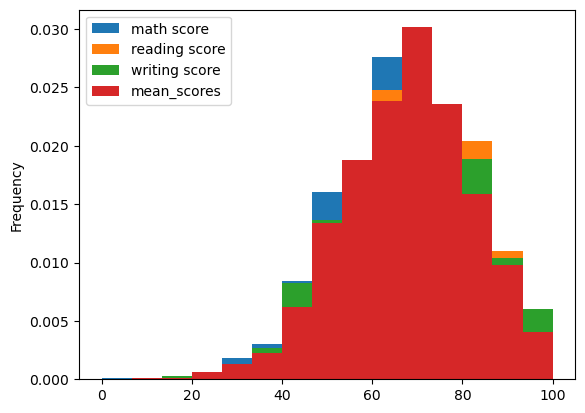

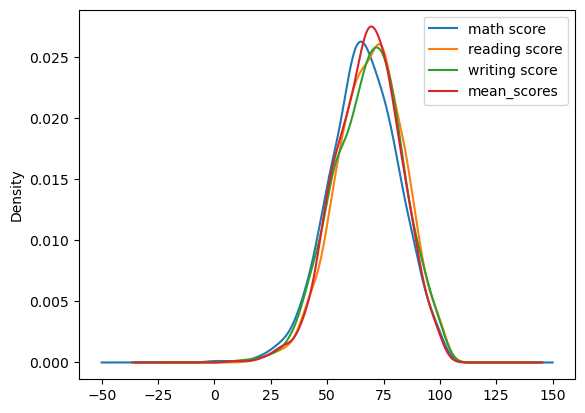

In [68]:
def histogramPlot(variable):
    variable.plot(kind = "hist", density = True, bins = 15)
    variable.plot(kind = "kde");

if __name__=='__main__':
    histogramPlot(data)

In [69]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [70]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'mean_scores'],
      dtype='object')

In [71]:
def groupbyFunc(data, feature):
    # The function that you can use to analyze the mean of the features you have given and their situation in the data.
    values = data[feature].value_counts()
    
    # Exclude non-numeric columns from the mean analysis
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    columns_to_analyze = [col for col in numeric_columns if col != feature]
    
    feature_analysis = data.groupby(feature)[columns_to_analyze].mean()

    return values, feature_analysis

# Example usage
feature_values, feature_analysis_result = groupbyFunc(data, "parental level of education")

# Display the counts of unique values in the specified feature
print("Feature Values:")
print(feature_values)

# Display the mean analysis based on the specified feature
print("\nFeature Analysis:")
print(feature_analysis_result)


Feature Values:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Feature Analysis:
                             math score  reading score  writing score  \
parental level of education                                             
associate's degree            67.882883      70.927928      69.896396   
bachelor's degree             69.389831      73.000000      73.381356   
high school                   62.137755      64.704082      62.448980   
master's degree               69.745763      75.372881      75.677966   
some college                  67.128319      69.460177      68.840708   
some high school              63.497207      66.938547      64.888268   

                             mean_scores  
parental level of education               
associate's degree             69.569069  
bachelor's degree              71.923729 

In [72]:
def groupbyFunc(data, feature):
    # The function that you can use to analyze the mean of the features you have given and their situation in the data.
    values = data[feature].value_counts()

    # Identify numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    # Exclude non-numeric columns from the mean analysis
    columns_to_analyze = [col for col in numeric_columns if col != feature]

    # Perform mean analysis for numeric columns
    try:
        feature_analysis = data.groupby(feature)[columns_to_analyze].mean()
    except TypeError as e:
        print(f"Error: {e}")
        feature_analysis = None

    return values, feature_analysis

# Example usage
feature_values, feature_analysis_result = groupbyFunc(data, "race/ethnicity")

# Display the counts of unique values in the specified feature
print("Feature Values:")
print(feature_values)

# Display the mean analysis based on the specified feature
if feature_analysis_result is not None:
    print("\nFeature Analysis:")
    print(feature_analysis_result)
else:
    print("\nFeature Analysis not available for 'race/ethnicity'.")


Feature Values:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Feature Analysis:
                math score  reading score  writing score  mean_scores
race/ethnicity                                                       
group A          61.629213      64.674157      62.674157    62.992509
group B          63.452632      67.352632      65.600000    65.468421
group C          64.463950      69.103448      67.827586    67.131661
group D          67.362595      70.030534      70.145038    69.179389
group E          73.821429      73.028571      71.407143    72.752381


In [73]:
# Secondly
groupbyFunc(data, "race/ethnicity")

(race/ethnicity
 group C    319
 group D    262
 group B    190
 group E    140
 group A     89
 Name: count, dtype: int64,
                 math score  reading score  writing score  mean_scores
 race/ethnicity                                                       
 group A          61.629213      64.674157      62.674157    62.992509
 group B          63.452632      67.352632      65.600000    65.468421
 group C          64.463950      69.103448      67.827586    67.131661
 group D          67.362595      70.030534      70.145038    69.179389
 group E          73.821429      73.028571      71.407143    72.752381)

In [74]:
# Lastly
groupbyFunc(data, "gender")

(gender
 female    518
 male      482
 Name: count, dtype: int64,
         math score  reading score  writing score  mean_scores
 gender                                                       
 female   63.633205      72.608108      72.467181    69.569498
 male     68.728216      65.473029      63.311203    65.837483)

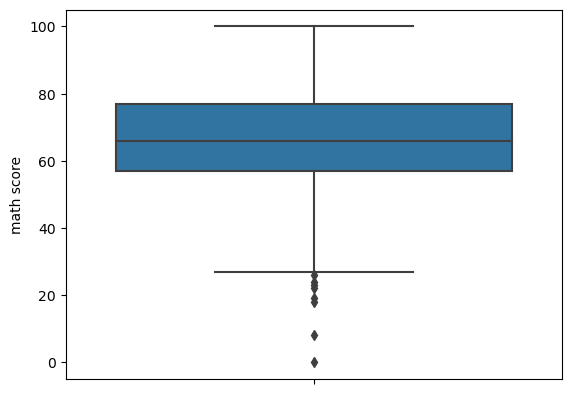

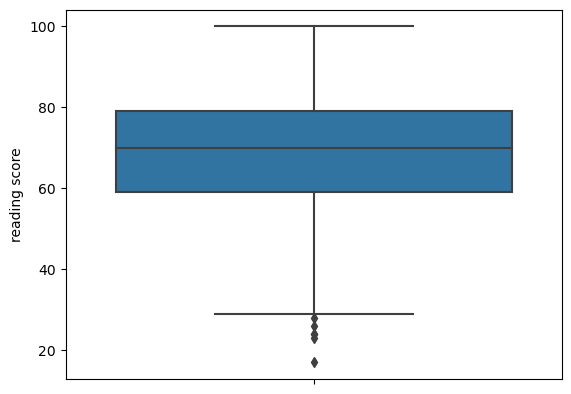

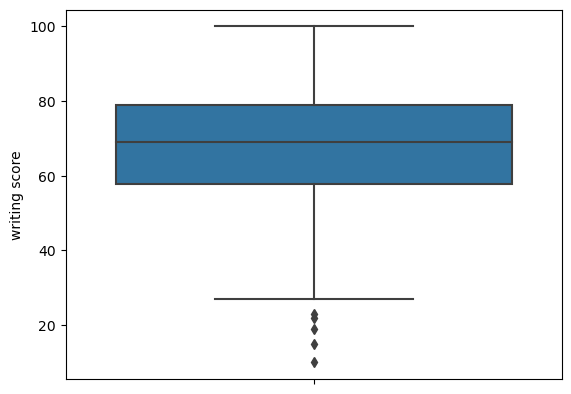

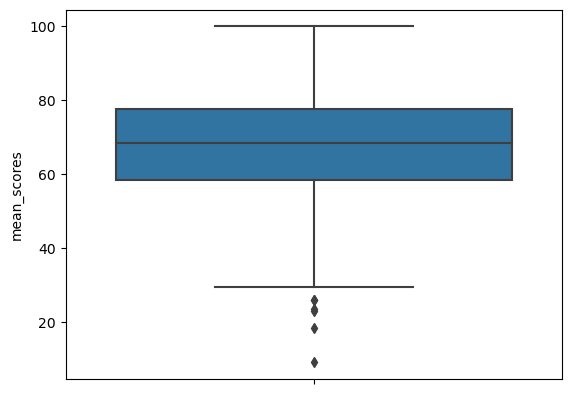

In [75]:
# I have to drop values of outlier scores to take a better rmse value.
sns.boxplot( y = data["math score"])
plt.show()

sns.boxplot(y = data["reading score"] )
plt.show()


sns.boxplot(y = data["writing score"])
plt.show()

sns.boxplot(y = data["mean_scores"])
plt.show()


In [76]:
def drop_outliers(df,column_name,lower,upper):
    drop_outliers = df[column_name].between(df[column_name].quantile(lower), df[column_name].quantile(upper))
    
    print(str(df[column_name][drop_outliers].size) + "/" + str(df[column_name].size) + " data points remain.") 

    index_names = df[~drop_outliers].index
    return df.drop(index_names)


new_data = drop_outliers(data,"mean_scores",0.05,0.95) 

900/1000 data points remain.


In [77]:
print("data:",data.shape)
print("new_data:", new_data.shape)

data: (1000, 9)
new_data: (900, 9)


In [78]:
math_score = new_data["math score"]
reading_score = new_data["reading score"]
writing_score = new_data["writing score"]
mean_score = new_data["mean_scores"]
X_features = new_data.drop(["math score","reading score","writing score","mean_scores"],axis = 'columns') 

In [79]:
X_features

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
5,female,group B,associate's degree,standard,none
...,...,...,...,...,...
994,male,group A,high school,standard,none
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [80]:
X_features_encoded = X_features.apply(lambda x: x.astype('category')) 

X_features_encoded = pd.get_dummies(X_features_encoded,drop_first= True)
X_features_encoded


,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,False,True,False,False,False,True,False,False,False,False,True,True
1,False,False,True,False,False,False,False,False,True,False,True,False
3,True,False,False,False,False,False,False,False,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,True,True
5,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
994,True,False,False,False,False,False,True,False,False,False,True,True
996,True,False,True,False,False,False,True,False,False,False,False,True
997,False,False,True,False,False,False,True,False,False,False,False,False
998,False,False,False,True,False,False,False,False,True,False,True,False


In [81]:
mean_score

0      72.666667
1      82.333333
3      49.333333
4      76.333333
5      77.333333
         ...    
994    62.666667
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: mean_scores, Length: 900, dtype: float64

In [82]:
target = mean_score
X_train, X_val, y_train, y_val = train_test_split(X_features_encoded, 
                                                      target, 
                                                      test_size=0.4, 
                                                      shuffle = True, 
                                                      random_state=1)

In [83]:
# true ---> real     predicted---> predict
def calculateModel(real, predict):
    rmse = np.sqrt(mean_squared_error(real, predict))
    r2 = r2_score(real, predict)
    print("rmse:",rmse)
    print("r2 score:",r2)

In [84]:
# Define calculateModel function
def calculateModel(true_values, predicted_values):
    rmse = mean_squared_error(true_values, predicted_values, squared=False)
    r2 = r2_score(true_values, predicted_values)
    print(f"rmse: {rmse}\nr2 score: {r2}")

# Random Forest Regressor
print("Random Forest Regressor")
print("------------")
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
rf_pred_train = rf.predict(X_train)
print("Train set of RF")
calculateModel(y_train, rf_pred_train)

print("------------")
print("Test set of RF")
rf_pred_val = rf.predict(X_val)
calculateModel(y_val, rf_pred_val)
print("------------")

# Linear Regression
print("Linear Regression")
print("------------")
lr = LinearRegression().fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)
print("Train set of LR")
calculateModel(y_train, lr_pred_train)

print("------------")
print("Test set of LR")
lr_pred_val = lr.predict(X_val)
calculateModel(y_val, lr_pred_val)


Random Forest Regressor
------------
Train set of RF
rmse: 8.574682009141531
r2 score: 0.41783250568166785
------------
Test set of RF
rmse: 11.790181517501644
r2 score: -0.08320858927677355
------------
Linear Regression
------------
Train set of LR
rmse: 10.346337851989173
r2 score: 0.15241118329678915
------------
Test set of LR
rmse: 10.33611640104146
r2 score: 0.16749683103976298


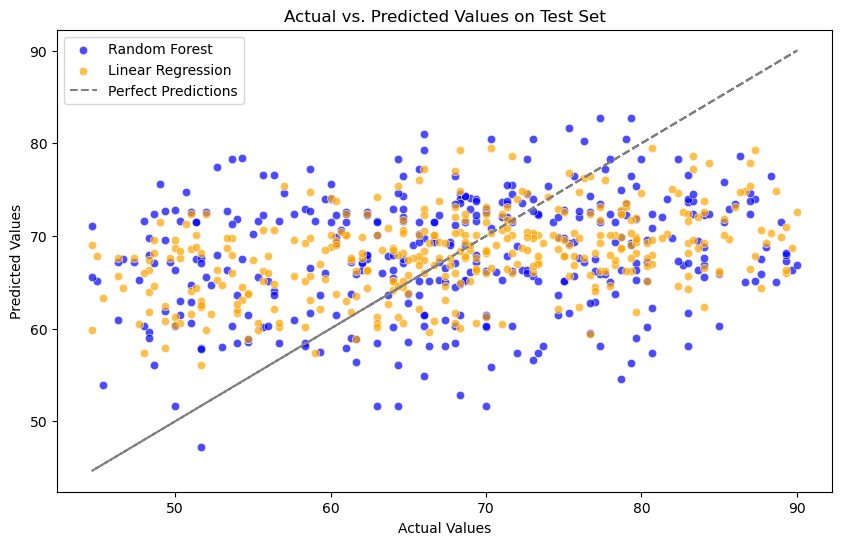

In [85]:


# Plotting for Random Forest and Linear Regression on the test set
plt.figure(figsize=(10, 6))

# Scatter plot for Random Forest
sns.scatterplot(x=y_val, y=rf_pred_val, label="Random Forest", color="blue", alpha=0.7)

# Scatter plot for Linear Regression
sns.scatterplot(x=y_val, y=lr_pred_val, label="Linear Regression", color="orange", alpha=0.7)

# Adding a line for perfect predictions
plt.plot(y_val, y_val, linestyle="--", color="gray", label="Perfect Predictions")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values on Test Set")
plt.legend()
plt.show()


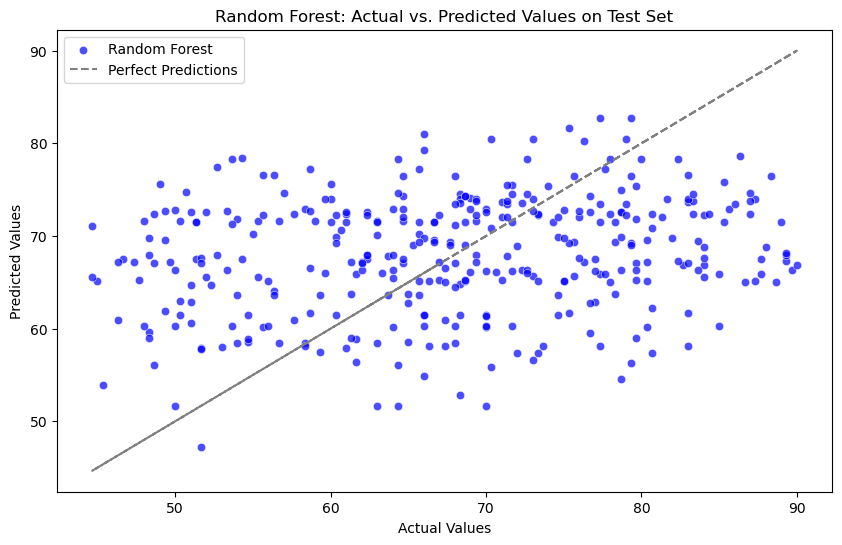

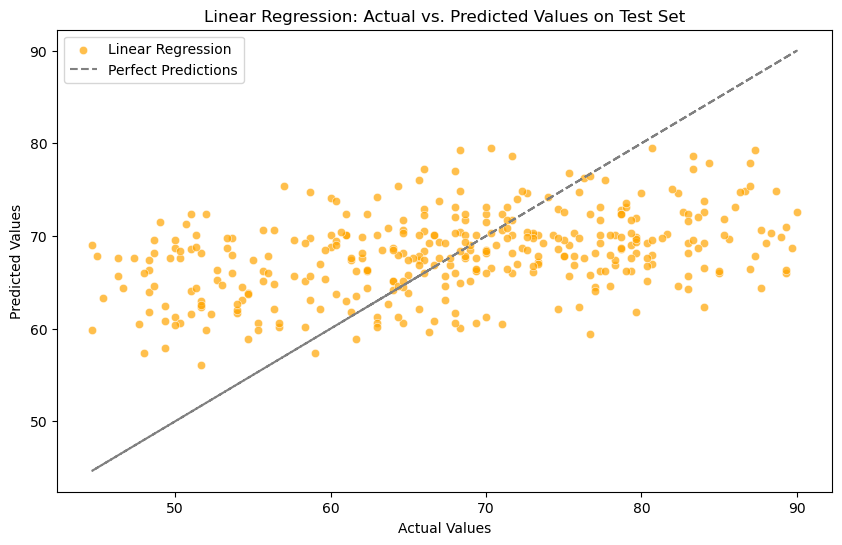

In [86]:

# Plotting for Random Forest on the test set
plt.figure(figsize=(10, 6))

# Scatter plot for Random Forest
sns.scatterplot(x=y_val, y=rf_pred_val, label="Random Forest", color="blue", alpha=0.7)

# Adding a line for perfect predictions
plt.plot(y_val, y_val, linestyle="--", color="gray", label="Perfect Predictions")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs. Predicted Values on Test Set")
plt.legend()
plt.show()

# Plotting for Linear Regression on the test set
plt.figure(figsize=(10, 6))

# Scatter plot for Linear Regression
sns.scatterplot(x=y_val, y=lr_pred_val, label="Linear Regression", color="orange", alpha=0.7)

# Adding a line for perfect predictions
plt.plot(y_val, y_val, linestyle="--", color="gray", label="Perfect Predictions")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted Values on Test Set")
plt.legend()
plt.show()


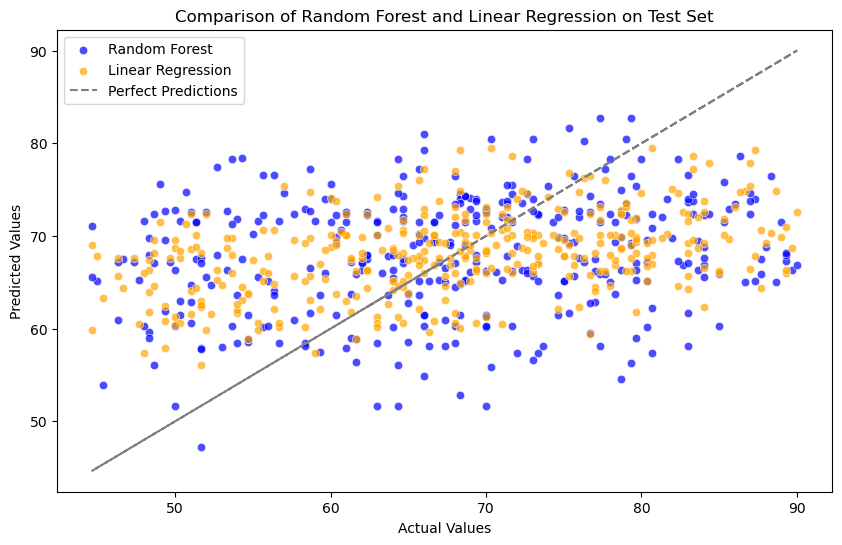

In [87]:

# Predictions on the test set
rf_pred_val = rf.predict(X_val)
lr_pred_val = lr.predict(X_val)

# Scatter plot for comparison
plt.figure(figsize=(10, 6))

# Scatter plot for Random Forest
sns.scatterplot(x=y_val, y=rf_pred_val, label="Random Forest", color="blue", alpha=0.7)

# Scatter plot for Linear Regression
sns.scatterplot(x=y_val, y=lr_pred_val, label="Linear Regression", color="orange", alpha=0.7)

# Adding a line for perfect predictions
plt.plot(y_val, y_val, linestyle="--", color="gray", label="Perfect Predictions")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of Random Forest and Linear Regression on Test Set")
plt.legend()
plt.show()


In [90]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Values': y_val,
    'Random Forest Predictions': rf_pred_val,
    'Linear Regression Predictions': lr_pred_val
})

# Display the DataFrame
print(comparison_df.head(10))  # Displaying the first 10 rows for illustration


     Actual Values  Random Forest Predictions  Linear Regression Predictions
954      66.666667                  71.502085                      70.139262
977      61.666667                  65.888869                      66.222075
971      73.000000                  74.045653                      70.125703
865      84.000000                  72.268603                      73.783698
585      72.333333                  66.348924                      68.684291
9        49.333333                  69.535270                      60.790673
760      63.000000                  51.698460                      61.296873
220      66.000000                  61.477333                      72.965782
723      46.666667                  67.547234                      64.396913
407      79.666667                  67.137073                      68.178091


In [3]:
!voila Final_project.ipynb


^C
